In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm
import random as rand

import sys
intmax = sys.maxsize

In [2]:
#Importing Data
df = pd.read_csv('../data/Iris.csv')

In [3]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
21,22,5.1,3.7,1.5,0.4,Iris-setosa
121,122,5.6,2.8,4.9,2.0,Iris-virginica
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
142,143,5.8,2.7,5.1,1.9,Iris-virginica
5,6,5.4,3.9,1.7,0.4,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa
20,21,5.4,3.4,1.7,0.2,Iris-setosa
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
46,47,5.1,3.8,1.6,0.2,Iris-setosa


In [4]:
#Mapping string to integer category for color plotting
codes = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
df['Species'] = df['Species'].map(codes)

In [5]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,2,4.9,3.0,1.4,0.2,1
85,86,6.0,3.4,4.5,1.6,2
120,121,6.9,3.2,5.7,2.3,3
131,132,7.9,3.8,6.4,2.0,3
70,71,5.9,3.2,4.8,1.8,2
79,80,5.7,2.6,3.5,1.0,2
58,59,6.6,2.9,4.6,1.3,2
31,32,5.4,3.4,1.5,0.4,1
42,43,4.4,3.2,1.3,0.2,1
49,50,5.0,3.3,1.4,0.2,1


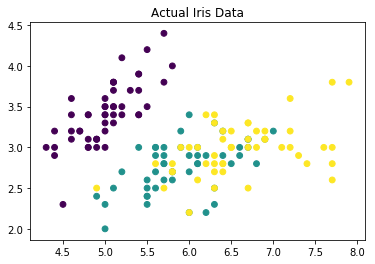

In [6]:
plt.title("Actual Iris Data")
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], 34, c=df['Species']) 

#### I'll be using Gaussian Mixture Model to group the set of datapoints in this Dataset into clusters based on their similarity. The clusters will come from different Gaussian distribution. 2-D data has been considered for modelling i.e. Sepal Length & Sepal Width.

In [7]:
#I'll be focusing on 3 clusters. Initial means will be 3 randomly selected data points from the input data

k1 = rand.randrange(len(df)) 
k2 = rand.randrange(len(df))
k3 = rand.randrange(len(df))

In [8]:
k1, k2, k3

(125, 107, 146)

In [9]:
#Initializations needed for later usage
shift = intmax
epsilon = 0.01
iters = 0
df_copy = df.copy()

In [10]:
df_copy.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


#### GMM works using Expectation - Maximization -- the algorithm initially assumes parameters of the model and then maximizes them by applying to a function. Afterwards, it uses the updated maximised parameters and continue the cycle untill convergence. The above numbers will be used for initial assumption as done below.

### Functions !!

In [11]:
def prob(val, mu, sig, lam):
    p = lam
    for i in range(len(val)):
        p *= norm.pdf(val[i], mu[i], sig[i][i])
    return p

In [12]:
# assign every data point to its most likely cluster
def expectation(dataFrame, parameters):
    for i in range(dataFrame.shape[0]):
        x = dataFrame['SepalLengthCm'][i]
        y = dataFrame['SepalWidthCm'][i]
        
        
        #assigning the probablilities of each cluster
        prob_cluster1=prob([x,y],list(parameters['mu1']), list(parameters['sig1']), parameters['lambda'][0])
        prob_cluster2=prob([x,y],list(parameters['mu2']), list(parameters['sig2']), parameters['lambda'][1])
        prob_cluster3=prob([x,y],list(parameters['mu3']), list(parameters['sig3']),parameters['lambda'][2])
        
        # Labelling each data according to the probabilities of cluster
        if(prob_cluster1>=prob_cluster2)&(prob_cluster1>= prob_cluster3):
            dataFrame['label'][i] =1
        elif(prob_cluster2>=prob_cluster1)&(prob_cluster2>= prob_cluster3):
            dataFrame['label'][i] = 2
        elif(prob_cluster3>=prob_cluster1)&(prob_cluster3>= prob_cluster2):
            dataFrame['label'][i]=3
        else:dataFrame['label'][i]=np.random.choice(3, len(df))+1 
            
    return dataFrame

In [13]:
def maximization(dataFrame, parameters):
    datapoints_cluster1=dataFrame[dataFrame['label']==1]
    datapoints_cluster2=dataFrame[dataFrame['label']==2]
    datapoints_cluster3=dataFrame[dataFrame['label'] == 3]
    percentage_cluster1=len(datapoints_cluster1)/float(len(dataFrame))
    percentage_cluster2=len(datapoints_cluster2)/float(len(dataFrame))
    percentage_cluster3=1-percentage_cluster1-percentage_cluster2
    parameters['lambda']=[percentage_cluster1,percentage_cluster2,percentage_cluster3 ]
    
    parameters['mu1']=[datapoints_cluster1['SepalLengthCm'].mean(),datapoints_cluster1['SepalWidthCm'].mean(), None]
    parameters['mu2']=[datapoints_cluster2['SepalLengthCm'].mean(),datapoints_cluster2['SepalWidthCm'].mean(), None]
    parameters['mu3']=[datapoints_cluster3['SepalLengthCm'].mean(),datapoints_cluster3['SepalWidthCm'].mean(), None]
    parameters['sig1']= [[datapoints_cluster1['SepalLengthCm'].std(),0 ], [0,datapoints_cluster1['SepalWidthCm'].std()], None]
    parameters['sig2']= [[datapoints_cluster2['SepalLengthCm'].std(),0], [0,datapoints_cluster2['SepalWidthCm'].std()], None]
    parameters['sig3']= [[datapoints_cluster3['SepalLengthCm'].std(),0], [0,datapoints_cluster3['SepalWidthCm'].std()], None]
    
    return parameters

In [14]:
def distance(old, new):
    dist = 0
    for param in ['mu1','mu2','mu3']:
        for i in range(len(old)):
            dist+=(old[param][i]-new[param][i])**2
    return dist**0.5

### Algorithm !!

In [15]:
#Initial input parameters - mean, variance and probability of drawing a point from thr mixture respectively
initial_assumption = { 
    'mu1': [df['SepalLengthCm'].loc[k1], df['SepalWidthCm'].loc[k1]],
    'sig1': [ [1, 0], [0, 1]],
    'mu2': [df['SepalLengthCm'].loc[k2],df['SepalWidthCm'].loc[k2]],
    'sig2': [ [2, 0], [0, 1]],
    'mu3': [df['SepalLengthCm'].loc[k3],df['SepalWidthCm'].loc[k3]],
    'sig3': [ [0.5, 0], [0, 1]],
    'lambda': [0.3, 0.3, 0.4]
        }

In [16]:
#Initially, assign all data points randomly to one of the clusters
df_copy['label']=map(lambda x:x+1, np.random.choice (3,len(df))) 

In [17]:
params = pd.DataFrame.from_dict(initial_assumption, orient = 'index')
params = params.transpose()

In [18]:
params

,mu1,sig1,mu2,sig2,mu3,sig3,lambda
0,7.2,"[1, 0]",7.3,"[2, 0]",6.3,"[0.5, 0]",0.3
1,3.2,"[0, 1]",2.9,"[0, 1]",2.5,"[0, 1]",0.3
2,NaN,NaN,NaN,NaN,NaN,NaN,0.4


In [19]:
while shift > epsilon:
    iters += 1
    
    #Expectation-step
    new_class = expectation(df_copy.copy(), params)
    
    #Maximization-step
    new_params = maximization(new_class, params.copy())
    
    #Updating the shift distance
    shift = distance(params, new_params)
    
    #updating the new labels and parameters for the next iteration
    df_copy = new_class
    params = new_params

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
params

,mu1,sig1,mu2,sig2,mu3,sig3,lambda
0,7.438462,"[0.2902253766140536, 0]",4.895652,"[0.2467175818975844, 0]",6.094505,"[0.45076789725056654, 0]",0.086667
1,3.130769,"[0, 0.3816294349772114]",3.197826,"[0, 0.44145674530016465]",2.970330,"[0, 0.41938963731554907]",0.306667
2,NaN,None,NaN,None,NaN,None,0.606667


In [21]:
df_copy.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
22,23,4.6,3.6,1.0,0.2,1,2
6,7,4.6,3.4,1.4,0.3,1,2
63,64,6.1,2.9,4.7,1.4,2,3
110,111,6.5,3.2,5.1,2.0,3,3
28,29,5.2,3.4,1.4,0.2,1,2
118,119,7.7,2.6,6.9,2.3,3,1
125,126,7.2,3.2,6.0,1.8,3,1
123,124,6.3,2.7,4.9,1.8,3,3
131,132,7.9,3.8,6.4,2.0,3,1
147,148,6.5,3.0,5.2,2.0,3,3


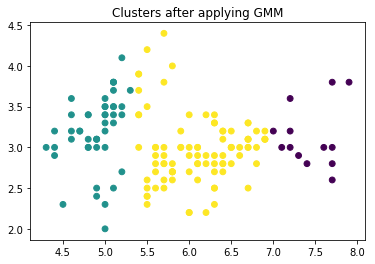

In [22]:
plt.title("Clusters after applying GMM")
plt.scatter(df_copy['SepalLengthCm'], df_copy['SepalWidthCm'], 34, c=df_copy['label']) 

In [23]:
#Reference: https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php
# https://github.com/scikit-learn/scikit-learn/blob/7389dba/sklearn/mixture/gaussian_mixture.py#L435
# https://github.com/yuanzhuangl/GMM/blob/master/sol1.py